ur3.csv is the data for design 3 after cleaning(the one we cleaned two weeks ago) </br>
You need to upload ur3.csv first to run the code

In [ ]:
import pandas as pd
#be sure to put the right filename here
ur3 = pd.read_csv('design_3_clean.csv', header=[0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Using 30% testing data
C_test = ur3

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Main effect of design 3

In [ ]:
# Yuya's code, but changed a bit to fit our data with two headers
def build_plot(ax, data: pd.DataFrame, factor: str, factor_levels: np.ndarray, y: str,
    name: str, title: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    Builds a plot of the effect of the factor on y
    Parameters
    ----------
    ax: an axes object in matplotlib
    data (pandas.DataFrame): df containing data of the experiment.
    factor (str): the name of the independent variable.
    factor_levels (numpy.ndarray): the list of levels of factor.
    y (str): the name of the dependent variable.
    name (str): the version of the experiment.
    title (str): the title of this axes.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    # Create Arrays for the plot
    mean_outcomes = []
    se_outcomes = []
    num_students = []
    groups = factor_levels
    base_data = data # reference level
    for i in range(1, len(factor_levels)):
        base_data = base_data[base_data[factor + '_' + factor_levels[i]].iloc[:,0] == 0]
        assigned = data[
            data[factor + '_' + factor_levels[i]].iloc[:,0] == 1]
        num_students.append(len(assigned))
        if boxplot: # a boxplot requires a 2D array
            mean_outcomes.append(assigned[y].iloc[:,0])
        else:
            mean_outcomes.append(np.mean(assigned[y].iloc[:,0]))
            se_outcomes.append(stats.sem(assigned[y].iloc[:,0]))

    num_students.insert(0, len(base_data))
    if boxplot: # a boxplot requires a 2D array
        mean_outcomes.insert(0, base_data[y].iloc[:,0])
    else:
        mean_outcomes.insert(0, np.mean(base_data[y].iloc[:,0]))
        se_outcomes.insert(0, stats.sem(base_data[y].iloc[:,0]))                
    if name in old_exp: # factors with two levels
        groups = ['no', 'yes']
        mean_outcomes = mean_outcomes[:2]
        num_students = num_students[:2]
        if not boxplot:
            se_outcomes = se_outcomes[:2]
            
    x_pos = np.arange(len(groups))

    # Build the plot
    if boxplot:
        ax.boxplot(mean_outcomes, labels=groups, whis=2.0)
    else:
        ax.bar(x_pos, mean_outcomes, yerr=se_outcomes, align='center', 
            alpha=0.5, ecolor='black', capsize=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(groups, fontsize = 12)
    # Add text in graphs (mean and sample size)
    for i in range(len(groups)):
        if boxplot:
            ax.text(i+1, 0.2*max_plot_val, 'Median =', ha='center', va='bottom',
                    fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.15*max_plot_val, str(np.round(mean_outcomes[
                i].median(), 2)), ha='center', va='bottom', fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 16)
        else:
            ax.text(i, 0.2*max_plot_val, 'Mean =', ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.15*max_plot_val, str(np.round(
                mean_outcomes[i],2)), ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 14)

    ax.set_title(title, fontsize = 16)
    ax.set_ylim(min_plot_val, max_plot_val)
    ax.yaxis.grid(True)

In [ ]:
# Yuya's code (not changed)
def plot_main(data: pd.DataFrame, factors: np.ndarray, levels: np.ndarray, y: str, 
    ylabel: str, name: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    For each valid combination of independent (dummy) variables, plots interaction effects.
    Parameters
    ----------
    data (pandas.DataFrame): df containing data of the experiment.
    factors (numpy.ndarray): the list of the independent variables.
    levels (numpy.ndarray): the matrix of factor x level. Each raw represents a factor 
    and each element in a raw represents a level.
    y (str): the name of the dependent variable.
    ylabel (str): the description of the dependent variable that goes to a y-axis of a figure.
    name (str): the version of the experiment.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    
    for factor, factor_levels in zip(factors, levels):
        fig, ax = plt.subplots()
        try:
            build_plot(ax, data, factor, factor_levels, y, name, name.replace(
                '_', ' ').title(), max_plot_val, boxplot, old_exp, min_plot_val)
        except ValueError as e:
            print('Not enough data for ' + factor)
            continue
        ax.set_ylabel(ylabel, fontsize = 16)
        ax.set_xlabel(factor, fontsize = 16)
   
        # Save the figure and show
        plt.show()

In [ ]:
# create new column showC_1
C_test['showC_1', 'showC_1'] = (C_test['message_3_1', 'message_3_1'] == "Keep in touch with friends: when things are going well, as well as when they're not.").astype(int)

In [ ]:
# create new column showC_2
C_test['showC_2', 'showC_2'] = (C_test['message_3_1', 'message_3_1'] == "How can you keep in touch with friends: when things are going well, as well as when they're not?").astype(int)

In [ ]:
# create new column showC_3
C_test['showC_3', 'showC_3'] = (C_test['message_3_1', 'message_3_1'] == "How can you keep in touch with friends: when things are going well, as well as when they're not? Want ideas for texts to send? tiny.cc/textideas").astype(int)

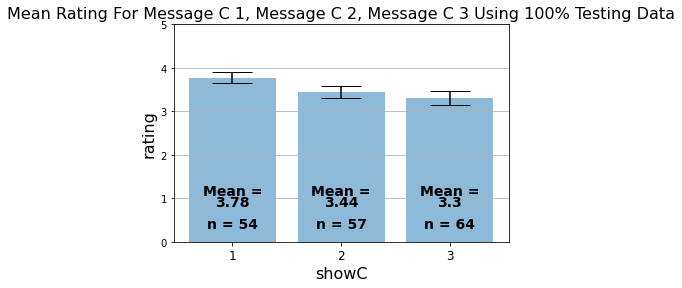

In [ ]:
# plot main effect for design 3
plot_main(C_test, np.array(['showC']),
          np.array([['1','2','3']]), 'reward_3_1',
          'rating', 'Mean Rating for message C_1, message C_2, message C_3 Using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[],
         min_plot_val=0)

# Step 0: Family-Wise Error Rate

In [ ]:
#Number of comaprisons:
c = sum(range(1,3)) # 1+ 2 = 3
alpha = 0.05 #for each individual test

fwe = 1- (1- alpha)**c
print(fwe)

0.1426250000000001


Since we are performing hypotheses tests, there's a 14.3% likelihood of us making one or more type 1 errors.

# Step 1 : One-Way ANOVA Omnibus

Now we've got 3 message versions here, so we're going to want to run an ANOVA first. An omnibus ANOVA test will let us know if there's any significant differences between any two of the message versions.

In [ ]:
# get each message version's reward rows
shown_C1_reward = C_test[C_test[("showC_1", "showC_1")] == 1.0]['reward_3_1'].iloc[:,0]
shown_C2_reward = C_test[C_test[("showC_2", "showC_2")] == 1.0]['reward_3_1'].iloc[:,0]
shown_C3_reward = C_test[C_test[("showC_3", "showC_3")] == 1.0]['reward_3_1'].iloc[:,0]

In [ ]:
stats.f_oneway(shown_C1_reward, shown_C2_reward, shown_C3_reward)

F_onewayResult(statistic=2.80729293677572, pvalue=0.0631370757084752)

Since pvalue is 0.0631370757084752, fail to reject H0, that is there is no signicant differences between any two of the message versions. <br/>
## Since we fail to reject the null hypothesis, no further analysis is required. But we still do further analysis here to see if they all come to the same conclusion.


# Step 2: Applying Multiple T-Test Comparisons (Uncorrected)

We're now going to compare every two message versions with a t-test and the result will be used in Step 4 later.

In [ ]:
from scipy import stats

In [ ]:
# Applying T-Test between C1 and C2
C1C2 = stats.ttest_ind(shown_C1_reward, shown_C2_reward, equal_var=False, nan_policy="omit")
print('T-test for C1 and C2: ' + str(C1C2))

T-test for C1 and C2: Ttest_indResult(statistic=1.7729370070565649, pvalue=0.07904566079899857)


In [ ]:
# Applying T-Test between C2 and C3
C2C3 = stats.ttest_ind(shown_C2_reward, shown_C3_reward, equal_var=False, nan_policy="omit")
print('T-test for C2 and C3: ' + str(C2C3))

T-test for C2 and C3: Ttest_indResult(statistic=0.6629750350833407, pvalue=0.5086338195818951)


In [ ]:
# Applying T-Test between C1 and C3
C1C3 = stats.ttest_ind(shown_C1_reward, shown_C3_reward, equal_var=False, nan_policy="omit")
print('T-test for C1 and C3: ' + str(C1C3))

T-test for C1 and C3: Ttest_indResult(statistic=2.341738557169022, pvalue=0.020929216071998345)


# Step 3: Applying Tukey Method (correction a)

The Tukey method of ANOVA is one that allows us to do all those pairwise comparisons but accounts for multiple comparison problem

In [ ]:
C_test[("message_version", 'message_version')] = C_test.apply(lambda x: x[("version_id_3_1", "version_id_3_1")] - 5302, axis=1)

In [ ]:
message_version_name = ["C1", "C2", "C3"]

In [ ]:
C_test[("message_version", 'message_version')] = C_test.apply(lambda x: message_version_name[int(x[("message_version", 'message_version')])], axis=1)

In [ ]:
C_test[("message_version", 'message_version')].value_counts()

C3    64
C2    57
C1    54
Name: (message_version, message_version), dtype: int64

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)


res2 = pairwise_tukeyhsd(C_test['reward_3_1'], C_test[("message_version", 'message_version')])

print(res2.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C1     C2  -0.3392 0.2493 -0.8409 0.1625  False
    C1     C3  -0.4809 0.0545  -0.969 0.0072  False
    C2     C3  -0.1417 0.7462 -0.6228 0.3394  False
---------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For all comparisons between two message versions, fail to reject the null hypothesis, that is there is no significant difference between any two of the message versions.

Figure(720x432)


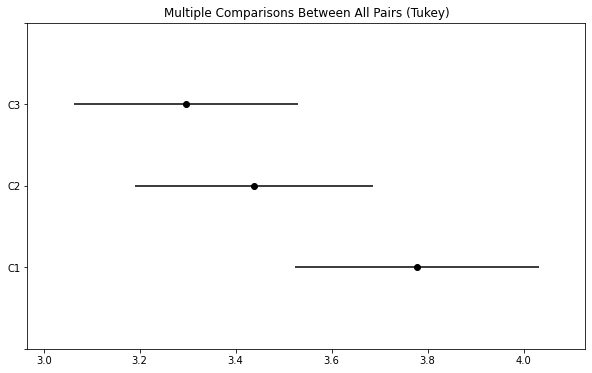

In [ ]:
print(res2.plot_simultaneous())


# Step 4: Applying the Bonferroni Method (correction b)

Now another method we could use to correct for multiple comparisons and p-hacking is the Bonferroni Method, however it is known to be extremely strict in determining what is significant.

This method prompts us to change our alpha based on how many comparisons we've done.

alpha_new = alpha_old / number_of_comparisons

In [ ]:
alpha_new = alpha/c
alpha_new

0.016666666666666666

In [ ]:
message_version_rewards = [shown_C1_reward, shown_C2_reward, shown_C3_reward]


In [ ]:
ttest_results = {}
 
for j in range(0, len(message_version_rewards) ):
  for i in range(j+1, len(message_version_rewards)):
    msg = 'T-test for ' + message_version_name[j] + ' and ' + message_version_name[i] + ':'
    ttest_results[msg] = stats.ttest_ind(message_version_rewards[j], message_version_rewards[i], equal_var=False, nan_policy="omit")
    i += 1

In [ ]:
ttest_results

{'T-test for C1 and C2:': Ttest_indResult(statistic=1.7729370070565649, pvalue=0.07904566079899857),
 'T-test for C1 and C3:': Ttest_indResult(statistic=2.341738557169022, pvalue=0.020929216071998345),
 'T-test for C2 and C3:': Ttest_indResult(statistic=0.6629750350833407, pvalue=0.5086338195818951)}

In [ ]:
sig_results_bonferroni = {}
for key in ttest_results.keys():
  if ttest_results[key].pvalue < alpha_new:
    sig_results_bonferroni[key] = ttest_results[key]

sig_results_bonferroni

{}

For all comparisons between two message versions, fail to reject the null hypothesis, that is there is no significant difference between any two of the message versions. </br>
(Step 2, Step 3 and Step 4 have the same result). 

**C1**: Keep in touch with friends: when things are going well, as well as when they're not. </br>
**C2**: How can you keep in touch with friends: when things are going well, as well as when they're not? </br>
**C3**: How can you keep in touch with friends: when things are going well, as well as when they're not? Want ideas for texts to send? tiny.cc/textideas